In [1]:
# Importing useful libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [11]:
# Loading data into train and test data frames

train_df = pd.read_csv('data/fraudTrain.csv')
test_df = pd.read_csv('data/fraudTest.csv')

In [13]:
# Preprocessor function creation

def preprocess_data(df):
    '''
    1. Takes the data frame with text values and transform them with label encoder.
    2. Formats data and time in data frame.
    3. Drops columns with low significance and power of prediction.
    '''
    le = LabelEncoder()
    df['category'] = le.fit_transform(df['category'])
    df['gender'] = le.fit_transform(df['gender'])
    
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['dob'] = pd.to_datetime(df['dob'])
    
    df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
    df['age'] = (df['trans_date_trans_time'].dt.year - df['dob'].dt.year)
    
    df.drop(columns=['trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time'], inplace=True)
    
    return df

# Preprocessing training and testing data frames

train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

In [15]:
# Sorting and creating training and testing datasets

x_train = train_df.drop(columns=['is_fraud'])
y_train = train_df['is_fraud']

x_test = test_df.drop(columns=['is_fraud'])
y_test = test_df['is_fraud']

In [16]:
# Scaling and standardising features

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [17]:
# Model training and prediction on test data

model_dt = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
model_dt.fit(x_train_scaled, y_train)
y_pred = model_dt.predict(x_test_scaled) 

In [24]:
# Accuracy and classification report of model

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy = {accuracy:.4f}")
print(f"F1 Score = {f1:.4f}")
print('\nClassification Report')
print(classification_report(y_test, y_pred))

Accuracy = 0.9988
F1 Score = 0.9987

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.91      0.76      0.83      2145

    accuracy                           1.00    555719
   macro avg       0.95      0.88      0.91    555719
weighted avg       1.00      1.00      1.00    555719



Text(0.5, 1.0, 'CC Fraud Detection')

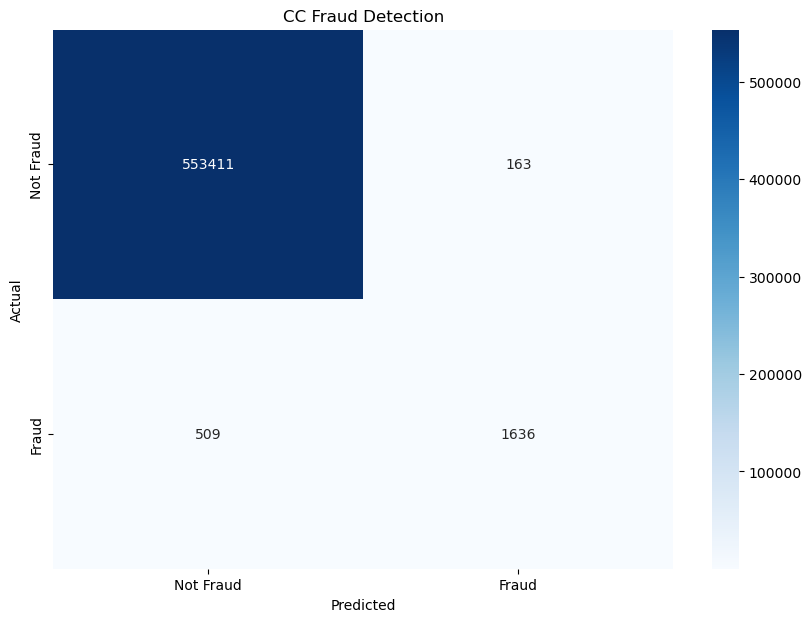

In [26]:
# Plotting confusion matrix heatmap for model

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CC Fraud Detection')